In [27]:
import torch
import torch.nn as nn
import torch.optim as optim

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import collections
import re

In [2]:
class Perceptron(nn.Module):
    def __init__(self, input_dim):
        super().__init__()

        self.fc1 = nn.Linear(input_dim, 1)
        self.layers = nn.Sigmoid()
    
    def forward(self, X):
        z = self.fc1(X)
        y = self.layers(z).squeeze()

        return y

C:\Users\admin\AppData\Local\Temp\ipykernel_1936\1059929124.py:1: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  x = torch.range(-5, 5, 0.1)


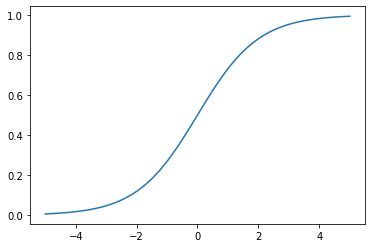

In [5]:
x = torch.range(-5, 5, 0.1)
y = torch.sigmoid(x)
plt.plot(x.numpy(), y.numpy())
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_1936\11819686.py:1: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  x = torch.range(-5, 5, 0.1)


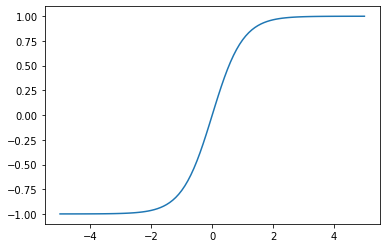

In [6]:
x = torch.range(-5, 5, 0.1)
y = torch.tanh(x)
plt.plot(x.numpy(), y.numpy())
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_1936\2457626146.py:2: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  x = torch.range(-5, 5, 0.1)


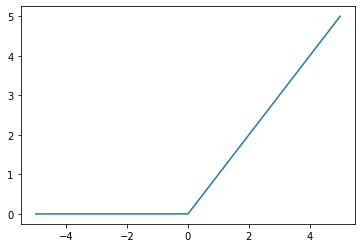

In [9]:
relu = nn.ReLU()
x = torch.range(-5, 5, 0.1)
y = relu(x)
plt.plot(x.numpy(), y.numpy())
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_1936\1977922806.py:2: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  x = torch.range(-5, 5, 0.1)


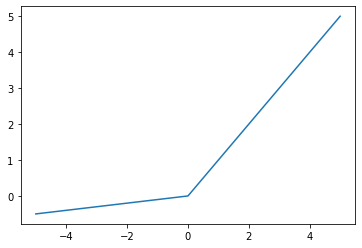

In [11]:
relu = nn.LeakyReLU(0.1)
x = torch.range(-5, 5, 0.1)
y = relu(x)
plt.plot(x.numpy(), y.numpy())
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_1936\3096612259.py:2: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  x = torch.range(-5, 5, 0.1)


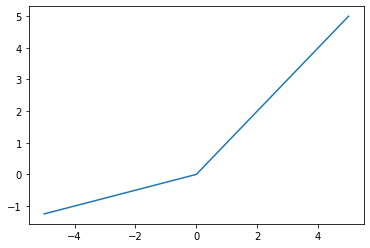

In [14]:
relu = nn.PReLU(num_parameters=1)
x = torch.range(-5, 5, 0.1)
y = relu(x)
plt.plot(x.detach().numpy(), y.detach().numpy())
plt.show()

In [17]:
softmax = nn.Softmax(dim=-1)
x = torch.randn(1, 3)
y = softmax(x)
print(x)
print(y)
print(torch.sum(y, dim=-1))

tensor([[ 0.2025, -0.0051, -1.2204]])
tensor([[0.4870, 0.3957, 0.1174]])
tensor([1.])


In [18]:
mse_loss = nn.MSELoss()
outputs = torch.randn(3, 5, requires_grad=True)
targets = torch.randn(3, 5)
loss = mse_loss(outputs, targets)
print(loss)

tensor(1.6065, grad_fn=<MseLossBackward0>)


In [22]:
ce_loss = nn.CrossEntropyLoss()
outputs = outputs = torch.randn(3, 5, requires_grad=True)
targets = torch.tensor([1, 0, 3], dtype=torch.int64)
loss = ce_loss(outputs, targets)
print(loss)

tensor(2.6080, grad_fn=<NllLossBackward0>)


In [23]:
bce_loss = nn.BCELoss()
sigmoid = nn.Sigmoid()
prob = sigmoid(torch.randn(4, 1, requires_grad=True))
targets = torch.tensor([1, 0, 1, 0], dtype=torch.float32).reshape(4, 1)
loss = bce_loss(prob, targets)
print(prob)
print(loss)

tensor([[0.4349],
        [0.2174],
        [0.0555],
        [0.6651]], grad_fn=<SigmoidBackward0>)
tensor(1.2656, grad_fn=<BinaryCrossEntropyBackward0>)


In [25]:
input_dim = 2
lr = 0.001
perceptron = Perceptron(input_dim=input_dim)
bce_loss = nn.BCELoss()
optimizer = optim.Adam(perceptron.parameters())